In [99]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

In [100]:
df = pd.read_csv(r'train.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

# Plan

- Get used to the data
- Exploratory data analysis
- Data clearning 
- Check whether the target is normally distributed. If not, transform using np.log1p
- Handle missing values
- Handle outliers
- Check correlation between numerical variables
- Add features if needed
- Get dummies
- Train-Test-Val split
- Train model


# Get used to the data

In [102]:
for col in df.columns:
    print('###', col, ':\n')
    if len(df[col].unique()) >= 10:
        print(df[col].unique()[:10], ' (len = {})\n'.format(len(df[col].unique())))
    else:
        print(df[col].unique(), ' (len = {})\n'.format(len(df[col].unique())), '\n')
    print('Dtype: {}'.format(df[col].dtype))
    print('Number of null values: {}'.format(df[col].isnull().sum()), '\n')
    print('---------------------\n')

### id :

[ 6901257  6304928  7919400 13418779  3808709 12422935 11825529 13971273
   180792  5385260]  (len = 74111)

Dtype: int64
Number of null values: 0 

---------------------

### log_price :

[5.01063529 5.12989871 4.97673374 6.62007321 4.74493213 4.44265126
 4.41884061 4.78749174 3.58351894 4.60517019]  (len = 767)

Dtype: float64
Number of null values: 0 

---------------------

### property_type :

['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse']  (len = 35)

Dtype: object
Number of null values: 0 

---------------------

### room_type :

['Entire home/apt' 'Private room' 'Shared room']  (len = 3)
 

Dtype: object
Number of null values: 0 

---------------------

### amenities :

['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'
 '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid fri

Number of null values: 0 

---------------------

### last_review :

['2016-07-18' '2017-09-23' '2017-09-14' nan '2017-01-22' '2017-09-05'
 '2017-04-21' '2017-04-12' '2017-09-24' '2017-04-16']  (len = 1372)

Dtype: object
Number of null values: 15827 

---------------------

### latitude :

[40.69652363 40.76611542 40.80810999 37.77200448 38.92562692 37.75316405
 33.9804544  34.04673741 37.78112798 33.99256298]  (len = 74111)

Dtype: float64
Number of null values: 0 

---------------------

### longitude :

[ -73.99161685  -73.98903992  -73.94375584 -122.43161868  -77.03459552
 -122.42952608 -118.46282074 -118.26043892 -122.50109524 -117.89599661]  (len = 74111)

Dtype: float64
Number of null values: 0 

---------------------

### name :

['Beautiful brownstone 1-bedroom'
 'Superb 3BR Apt Located Near Times Square' 'The Garden Oasis'
 'Beautiful Flat in the Heart of SF!' 'Great studio in midtown DC'
 'Comfort Suite San Francisco' 'Beach Town Studio and Parking!!!11h'
 "Near LA Live, St

In [103]:
### Some comments after getting used to the data

"""
    - Drop id
    - Count amenities
    - Accommodates is actually ordinal categorical
    - Bed-type maybe ordinal categorical
    - Cancelation_policy is actually ordinal categorical
    - Count description
    - Drop description
    - host_response_rate is numerical
    - Need to explore more about neighborhood??
    - What about instant_bookable?
    - Drop longtitude
    - Drop latitude
    - Drop name
    - Create a new column: review_avg = (number_of_reviews/(last_review - first_review))
    - Create a new column: host_time = (last_review - host_since)
    - Drop thumbnail_url
    - Zipcode may be useful to fill nan for many columns
    - Create a new column: bed_avg = beds/bedrooms
"""

'\n    - Drop id\n    - Count amenities\n    - Accommodates is actually ordinal categorical\n    - Bed-type maybe ordinal categorical\n    - Cancelation_policy is actually ordinal categorical\n    - Count description\n    - Drop description\n    - host_response_rate is numerical\n    - Need to explore more about neighborhood??\n    - What about instant_bookable?\n    - Drop longtitude\n    - Drop latitude\n    - Drop name\n    - Create a new column: review_avg = (number_of_reviews/(last_review - first_review))\n    - Create a new column: host_time = (last_review - host_since)\n    - Drop thumbnail_url\n    - Zipcode may be useful to fill nan for many columns\n    - Create a new column: bed_avg = beds/bedrooms\n'

# Cleaning Data

In [104]:
# Drop id, name, thumbnail_url

df.drop(['id', 'name', 'thumbnail_url'], axis=1, inplace=True)

In [105]:
# Count amenities

def count_amenities(x):
    if x == '{}':
        return 0
    else:
        return len(x.split(','))
    
df['amenities_count'] = df['amenities'].apply(lambda x: count_amenities(x))


# drop amenities

df.drop(['amenities'], axis=1, inplace=True)

In [106]:
# Count the number of letters in description

df['description_count'] = df['description'].apply(lambda x: len(x))


# drop description

df.drop(['description'], axis=1, inplace=True)

In [107]:
# Transfrom host_response_rate to int

df['host_response_rate'][~df['host_response_rate'].isnull()] = df['host_response_rate'][~df['host_response_rate'].isnull()].apply(lambda x: float(x.split('%')[0]))
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: float(x))

In [108]:
# Convert first_review, last_review, host_since from string into datetime

df['first_review_date'] = pd.to_datetime(df['first_review'], format='%Y-%m-%d')
df['last_review_date'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df['host_since_date'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')

df.drop(['first_review', 'last_review', 'host_since'], axis=1, inplace=True)

# Add a feature named review_avg

#df['review_avg'] = df['number_of_reviews'] / (df['last_review_date'] - df['first_review_date']).dt.components['days']

# Add a feature named host_time

# df['host_time'] = (df['last_review_date'] - df['host_since_date']).dt.components['days']

In [109]:
# Add a feature named bed_avg

#df['bed_avg'] = df['beds']/df['bedrooms']

# Exploratory Data Analysis (EDA) on raw data

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

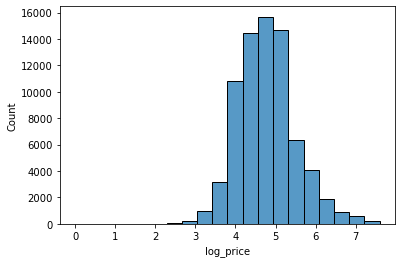

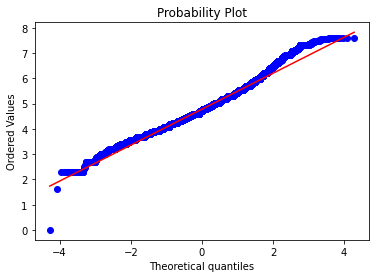

In [111]:
# Target Variable

sns.histplot(data=df, x='log_price', bins=20)
plt.show()
print('\n\n')

fig = plt.figure()
res = stats.probplot(df['log_price'], plot=plt)
plt.show()

The target variable is normally distributed. There is no need to transformed anymore. Besides, the price was already transformed by log function, which makes the distribution of the data more normal.

In [112]:
df.select_dtypes('number').columns

Index(['log_price', 'accommodates', 'bathrooms', 'host_response_rate',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'amenities_count', 'description_count'],
      dtype='object')

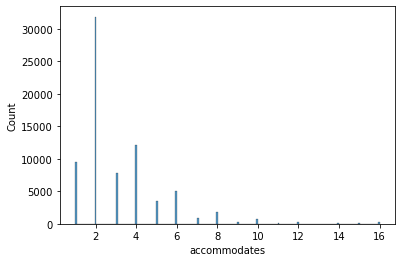

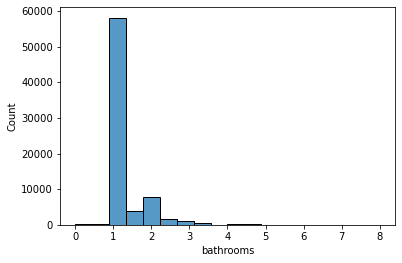

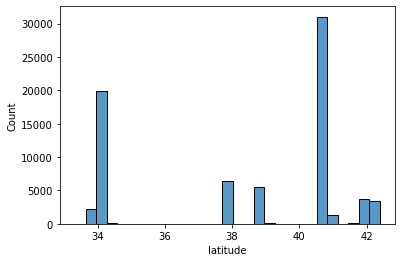

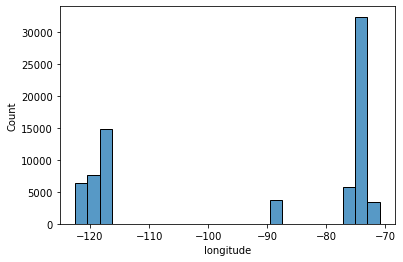

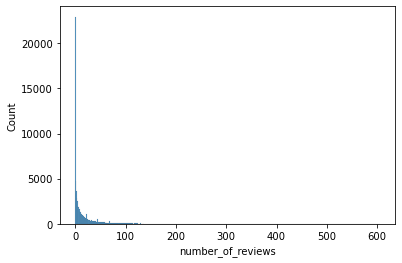

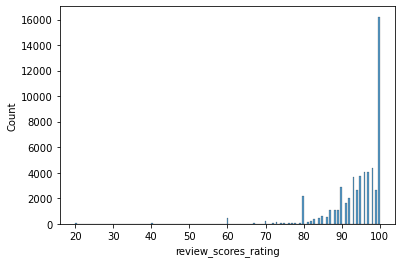

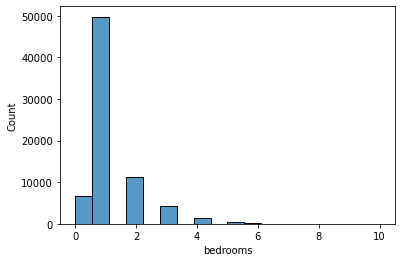

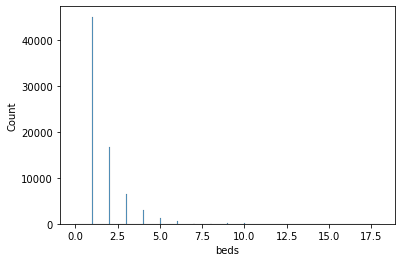

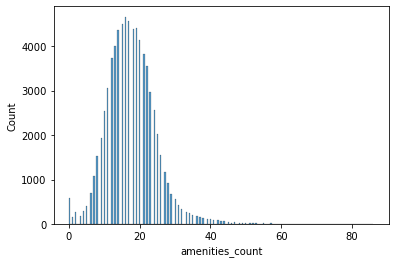

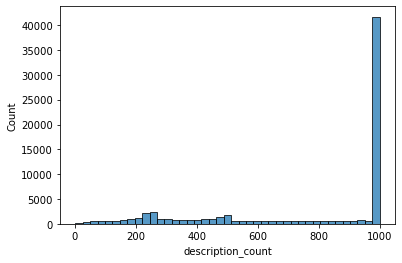

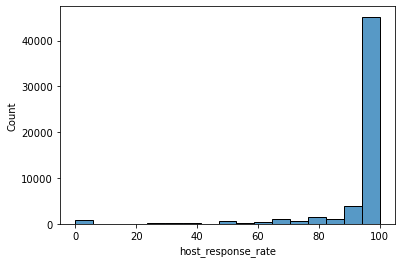

In [113]:
#####################################
# Numerical Variables (Univariable) #
#####################################

num_cols = ['accommodates', 'bathrooms', 'latitude', 'longitude',
            'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
            'amenities_count', 'description_count', 'host_response_rate']

for col in num_cols:
    sns.histplot(data=df, x=col)
    plt.show()


In [114]:
df['beds'].unique()

array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., nan, 10.,  8., 16.,  9., 13.,
       12., 11., 14., 15.,  0., 18.])

In [115]:
df['accommodates']

0        3
1        7
2        5
3        4
4        2
        ..
74106    1
74107    4
74108    5
74109    2
74110    4
Name: accommodates, Length: 74111, dtype: int64

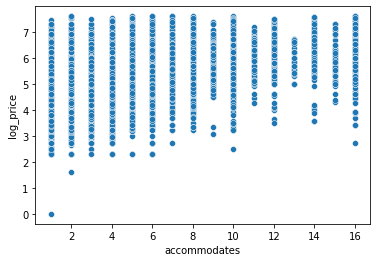

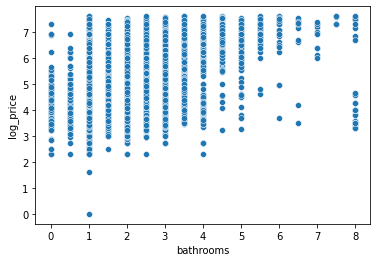

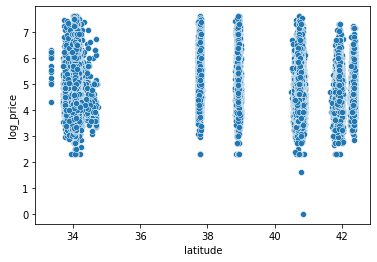

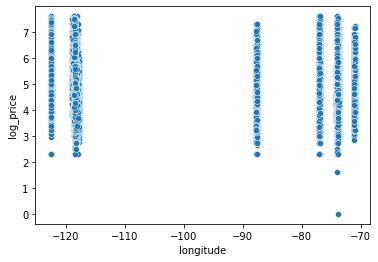

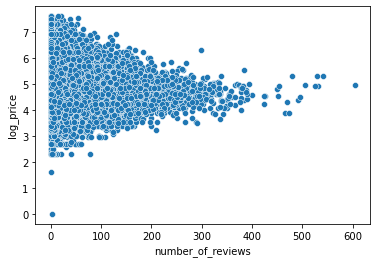

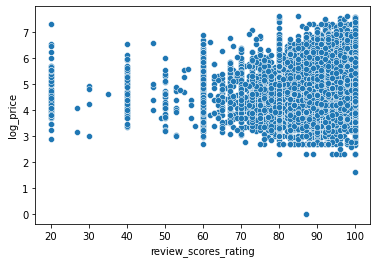

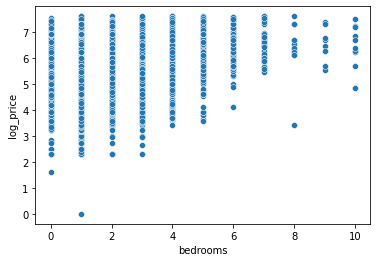

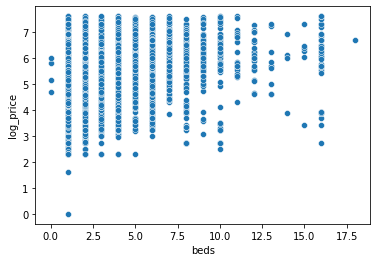

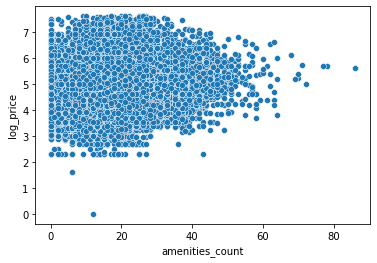

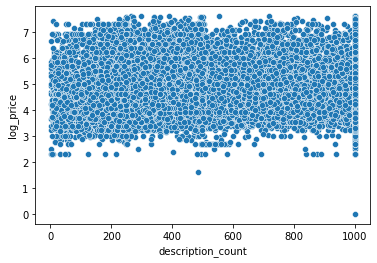

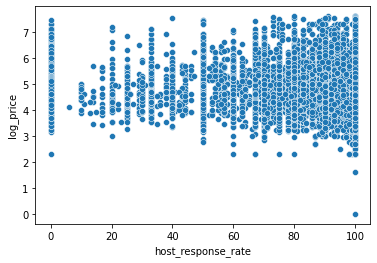

In [116]:
#######################################
# Numerical Variables (Multivariable) #
#######################################

num_cols = ['accommodates', 'bathrooms', 'latitude', 'longitude',
            'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
            'amenities_count', 'description_count', 'host_response_rate']

for col in num_cols:
    sns.scatterplot(data=df, x=col, y='log_price')
    plt.show()

Detected some outliers

<AxesSubplot:>

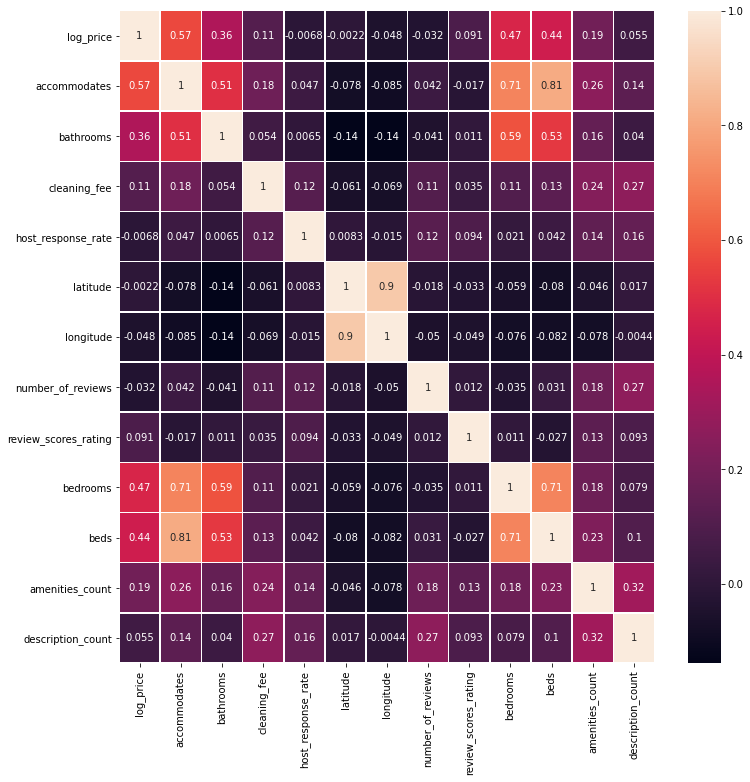

In [117]:
###########################################
# Correlation between numerical variables #
###########################################

fig = plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True, linewidths=0.5)

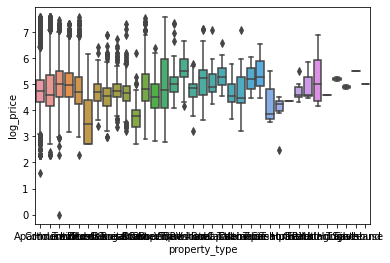

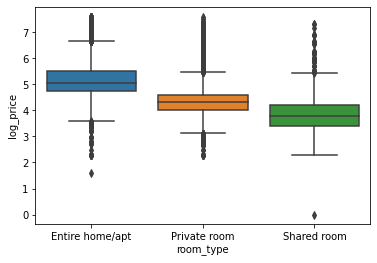

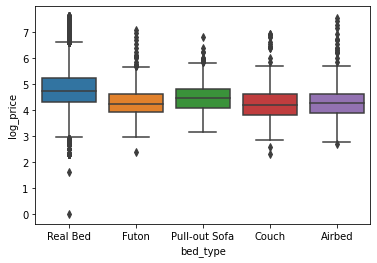

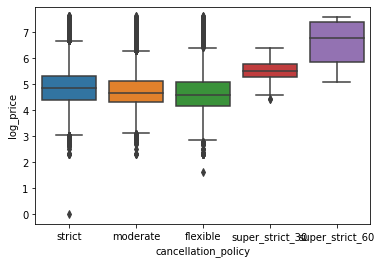

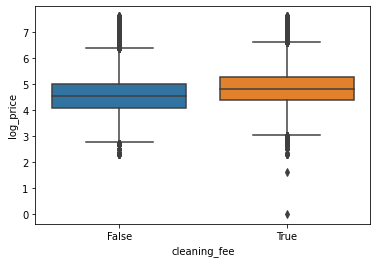

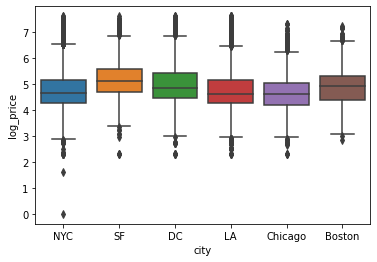

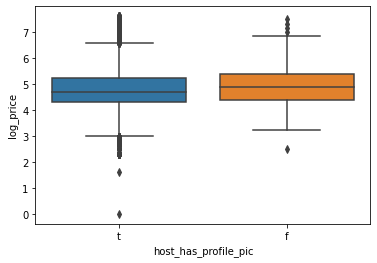

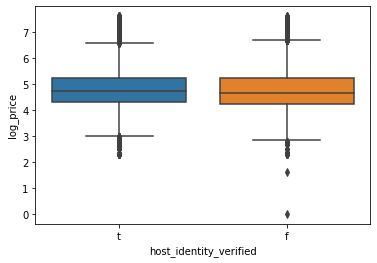

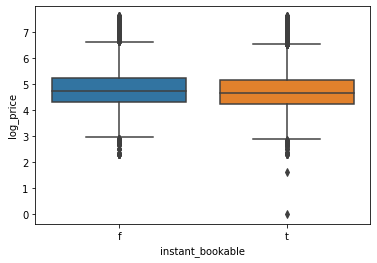

In [120]:
#########################
# Categorical variables #
#########################

cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable']

for col in cat_cols:
    sns.boxplot(data=df, x=col, y='log_price')
    plt.show()

# Handle missing values

In [123]:
df.isnull().sum().sort_values(ascending=False)

host_response_rate        18299
review_scores_rating      16722
first_review_date         15864
last_review_date          15827
neighbourhood              6872
zipcode                     966
bathrooms                   200
host_since_date             188
host_has_profile_pic        188
host_identity_verified      188
beds                        131
bedrooms                     91
description_count             0
amenities_count               0
number_of_reviews             0
log_price                     0
longitude                     0
property_type                 0
instant_bookable              0
city                          0
cleaning_fee                  0
cancellation_policy           0
bed_type                      0
accommodates                  0
room_type                     0
latitude                      0
dtype: int64

In [131]:
# host_response_rate

df.drop(['host_response_rate'], axis=1, inplace=True)

In [134]:
# review_scores_rating

df['review_scores_rating'] = df['review_scores_rating'].fillna(0)

In [155]:
# first_review_date, last_review_date
df.drop(['first_review_date', 'last_review_date'], axis=1, inplace=True)

In [165]:
# neighbourhood, zipcode

df.dropna(axis='rows', how='any', subset=['neighbourhood', 'zipcode'], inplace=True)

In [171]:
# bathrooms

df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [175]:
# host_since_date, host_has_profile_pic, host_identity_verified

df.dropna(axis='rows', how='any', subset=['host_since_date', 'host_has_profile_pic', 'host_identity_verified'], inplace=True)

In [183]:
# beds, bedrooms

df['beds'] = df.groupby(by='accommodates')['beds'].apply(lambda x: x.fillna(x.median()))
df['bedrooms'] = df.groupby(by='accommodates')['bedrooms'].apply(lambda x: x.fillna(x.median()))

In [184]:
# Check if there is any missing value left

df.isnull().sum().sort_values(ascending=False)

log_price                 0
latitude                  0
description_count         0
amenities_count           0
beds                      0
bedrooms                  0
zipcode                   0
review_scores_rating      0
number_of_reviews         0
neighbourhood             0
longitude                 0
instant_bookable          0
property_type             0
host_identity_verified    0
host_has_profile_pic      0
city                      0
cleaning_fee              0
cancellation_policy       0
bed_type                  0
bathrooms                 0
accommodates              0
room_type                 0
host_since_date           0
dtype: int64